# 가스사용량 예측

패키지임포트&데이터 불러오기

In [1]:
#패키지불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#데이터 불러오기
test = pd.read_csv("test.csv", encoding="utf-8", index_col=0)
temp = pd.read_csv("ta_20200329144537.csv", encoding = "cp949" , skiprows =7, usecols = ['평균기온(℃)'])
temp_test = pd.read_csv("ta_20200329204839.csv", encoding = "cp949" , skiprows =7, usecols = ['평균기온(℃)'])
sample = pd.read_csv("sample_submission.csv", encoding="utf-8", index_col=0)

In [3]:
temp1=temp.values[:-7,:]
temp1_test=temp_test.values[5:-7,:]

In [4]:
x=temp1
y=test.values[:,:]
print("x=",x.shape)
print("y=",y.shape)

x= (113, 1)
y= (10000, 113)


선형회귀모델만들기

In [16]:
line_fitter = LinearRegression()
model=line_fitter.fit(x, y.T)

In [6]:
W=model.coef_
b=model.intercept_.reshape(10000,1)
print("W=",model.coef_)
print("b=",model.intercept_)
print("W=",W.shape)
print("b=",b.shape)

W= [[-3.06201993]
 [-2.32832629]
 [-3.08658326]
 ...
 [-3.03092111]
 [-1.11216643]
 [-5.91888552]]
b= [ 84.66048907  74.10395583  83.46083752 ...  75.99082708  33.03855055
 149.90076898]
W= (10000, 1)
b= (10000, 1)


In [7]:
Z=np.dot(W,x.T)+b
print("Z=",Z.shape)

Z= (10000, 113)


In [8]:
pred=np.dot(W,temp1_test.T)+b
pred.reshape(10000,12)

array([[ 18.82706052,   2.90455687,  -0.76986705, ...,  52.50927978,
         43.62942197,  25.56350437],
       [ 24.04494059,  11.93764388,   9.14365233, ...,  49.65652978,
         42.90438354,  29.16725843],
       [ 17.09929737,   1.0490644 ,  -2.65483551, ...,  51.05171326,
         42.1006218 ,  23.88978055],
       ...,
       [ 10.82602311,  -4.93476669,  -8.57187203, ...,  44.16615537,
         35.37648414,  17.49404956],
       [  9.1269724 ,   3.34370698,   2.00910727, ...,  21.36080308,
         18.13552045,  11.57373853],
       [ 22.64473036,  -8.13347433, -15.23613695, ...,  87.75247105,
         70.58770305,  35.6662785 ]])

In [9]:
print(pred)
submission = pd.DataFrame(data=pred, columns=sample.columns, index=sample.index)
submission.to_csv('submission.csv')

[[ 18.82706052   2.90455687  -0.76986705 ...  52.50927978  43.62942197
   25.56350437]
 [ 24.04494059  11.93764388   9.14365233 ...  49.65652978  42.90438354
   29.16725843]
 [ 17.09929737   1.0490644   -2.65483551 ...  51.05171326  42.1006218
   23.88978055]
 ...
 [ 10.82602311  -4.93476669  -8.57187203 ...  44.16615537  35.37648414
   17.49404956]
 [  9.1269724    3.34370698   2.00910727 ...  21.36080308  18.13552045
   11.57373853]
 [ 22.64473036  -8.13347433 -15.23613695 ...  87.75247105  70.58770305
   35.6662785 ]]


In [11]:
#train data불러오기
train=pd.read_csv("train_data_cleansing.csv",skiprows =7)
y_train=train.values[:,:]
pred=np.dot(W,temp1_test.T)+b
pred.reshape(10000,12)

array([[ 18.82706052,   2.90455687,  -0.76986705, ...,  52.50927978,
         43.62942197,  25.56350437],
       [ 24.04494059,  11.93764388,   9.14365233, ...,  49.65652978,
         42.90438354,  29.16725843],
       [ 17.09929737,   1.0490644 ,  -2.65483551, ...,  51.05171326,
         42.1006218 ,  23.88978055],
       ...,
       [ 10.82602311,  -4.93476669,  -8.57187203, ...,  44.16615537,
         35.37648414,  17.49404956],
       [  9.1269724 ,   3.34370698,   2.00910727, ...,  21.36080308,
         18.13552045,  11.57373853],
       [ 22.64473036,  -8.13347433, -15.23613695, ...,  87.75247105,
         70.58770305,  35.6662785 ]])

In [12]:
y1=y[1].reshape(113,1)
Z1=Z[1].reshape(113,1)

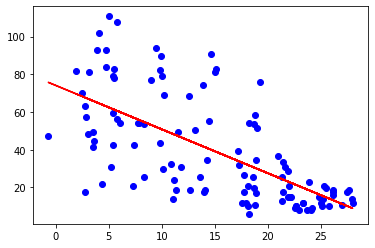

In [13]:
plt.plot(x,y1,'o',color="blue")
plt.plot(x,Z1,color="red")

In [14]:
def predict(Z, n, x, y):
    Zn = Z[n].reshape(113,1)
    yn = y[n].reshape(113,1)
    plt.plot(x, yn, 'o', color = "blue")
    plt.plot(x, Zn, color = "red")
    plt.show()

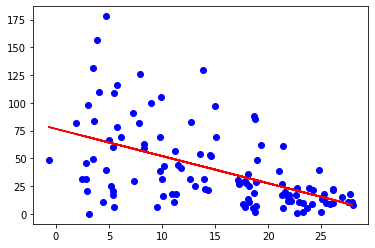

In [15]:
predict(Z,1000,x,y)